In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def imshow(images, figsize=(20, 10)):
  image_num = len(images)
  plt.figure(figsize=figsize)
  for i in range(image_num):
    plt.subplot(1, image_num, i+1)
    plt.imshow(images[i], cmap='gray')

# Global thresholding

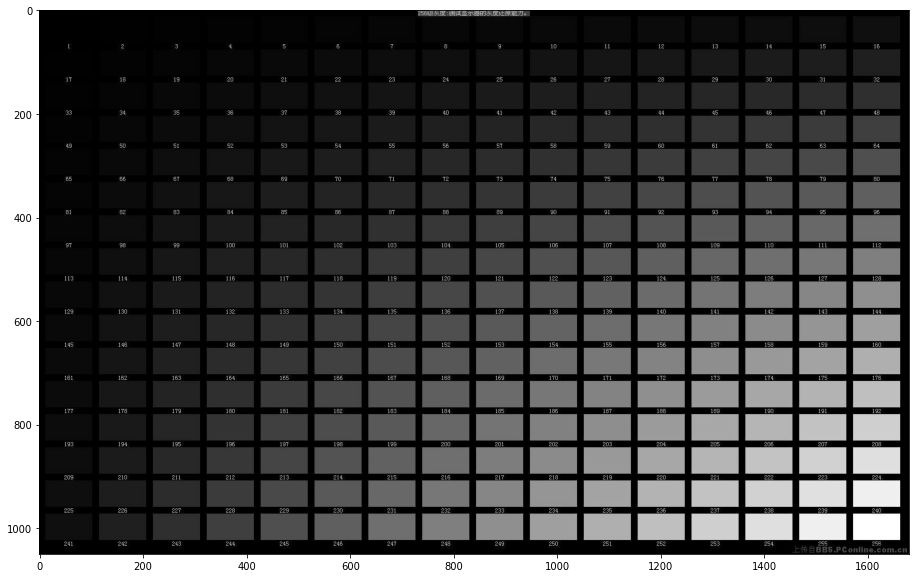

In [ ]:
img = cv2.imread('./brightness.jpg', 0)
imshow([img])

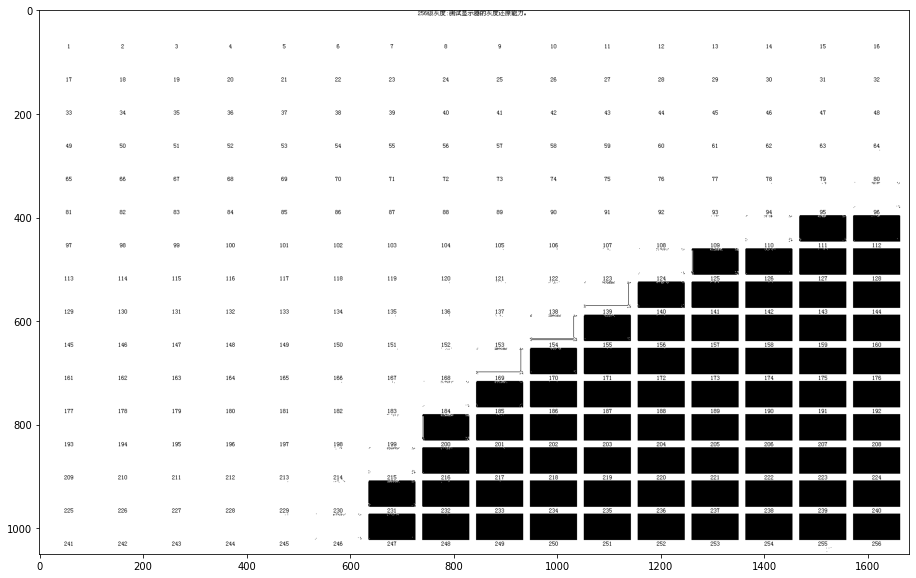

In [ ]:
thre, image_bin = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY_INV)
imshow([image_bin])

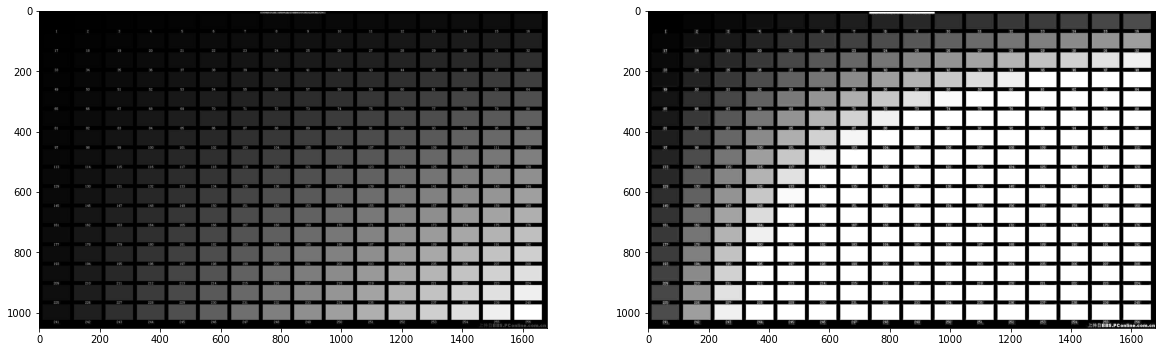

In [ ]:
thre, image_bin = cv2.threshold(img, 50, -1, cv2.THRESH_TRUNC)
imshow([img, image_bin])

In [ ]:
np.max(image_bin)

50

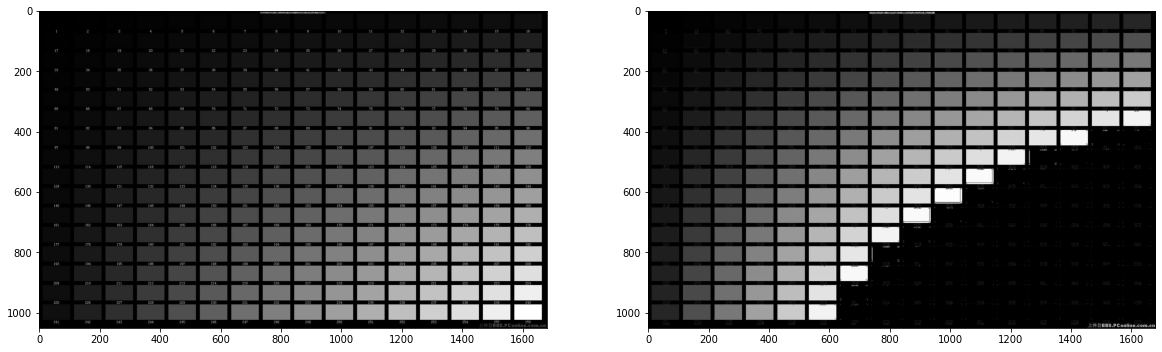

In [ ]:
thre, image_bin = cv2.threshold(img, 100, -1, cv2.THRESH_TOZERO_INV)
imshow([img, image_bin])

# Otsu Thresholding

In [ ]:
img = cv2.imread('./fruits.jpeg', 0)

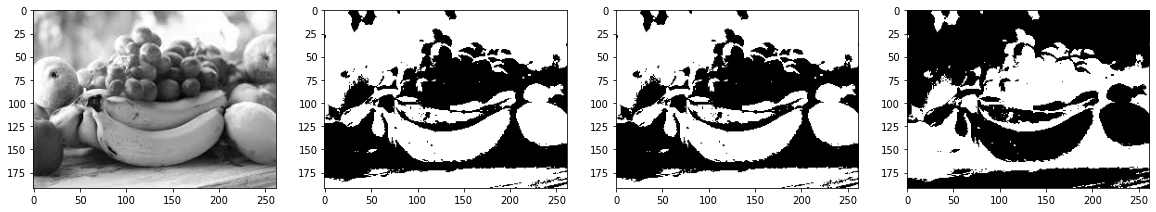

In [ ]:
# apply threshold
thre, image_bin = cv2.threshold(img, -1, 255, cv2.THRESH_OTSU)
thre, image_bin2 = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
thre, image_bin3 = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imshow([img, image_bin, image_bin2, image_bin3])

# Adaptive Thresholding

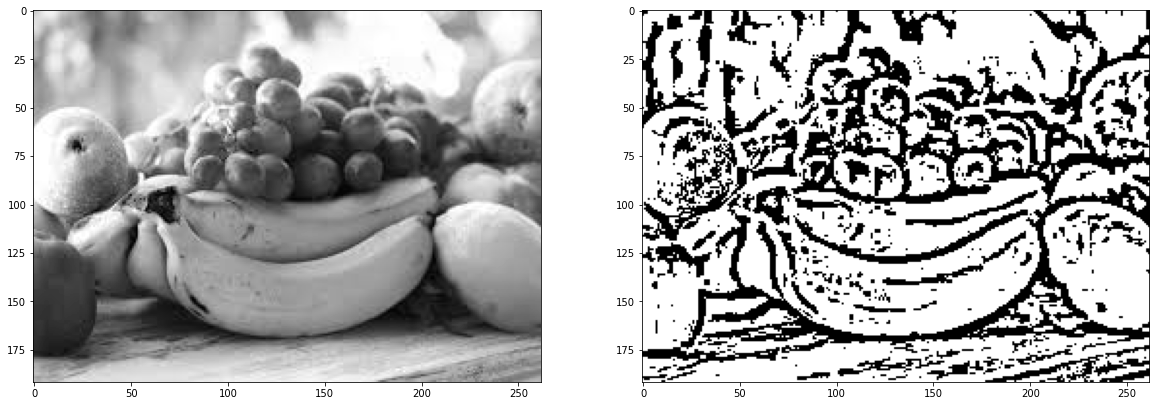

In [ ]:
image_bin = cv2.adaptiveThreshold(img, 255, cv2.THRESH_BINARY, cv2.ADAPTIVE_THRESH_MEAN_C, 9, 4)
imshow([img, image_bin])

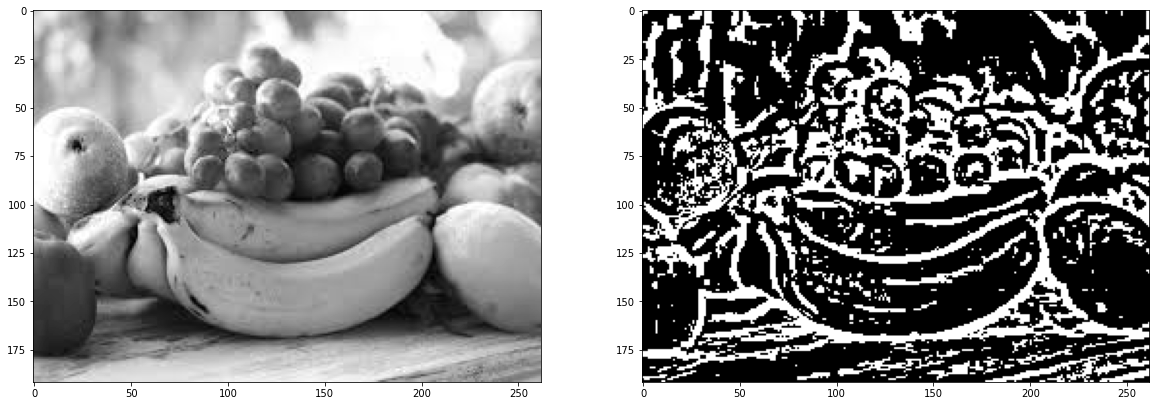

In [ ]:
image_bin = cv2.adaptiveThreshold(img, 255, cv2.THRESH_BINARY, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 9, 4)
imshow([img, image_bin])

# Morphology

In [ ]:
img = cv2.imread('./morph.png', 0)

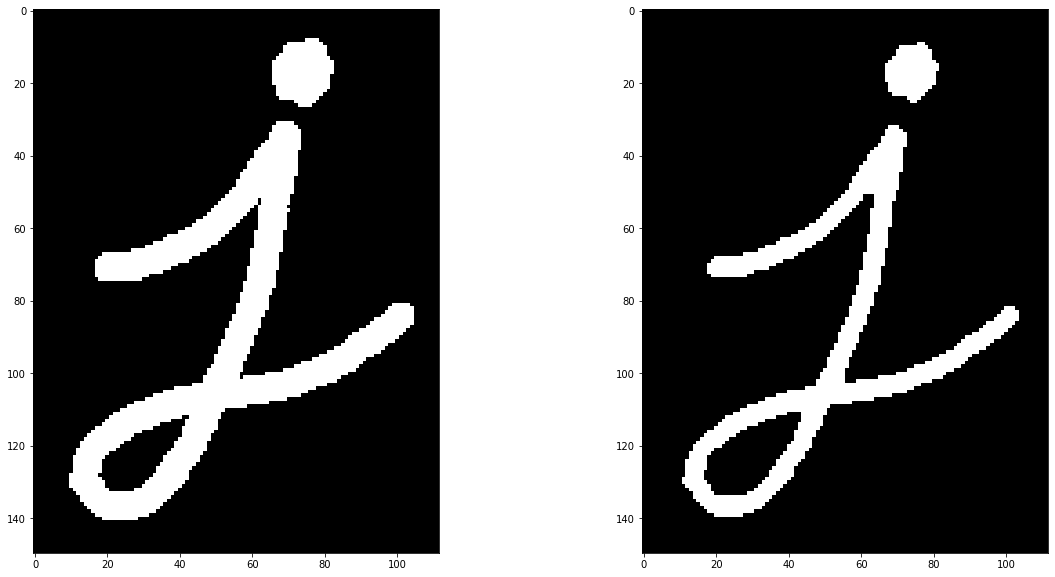

In [ ]:
# Erosion
# Define structure element
str_el = np.ones((3, 3))
img_er = cv2.erode(img, str_el)
imshow([img, img_er])

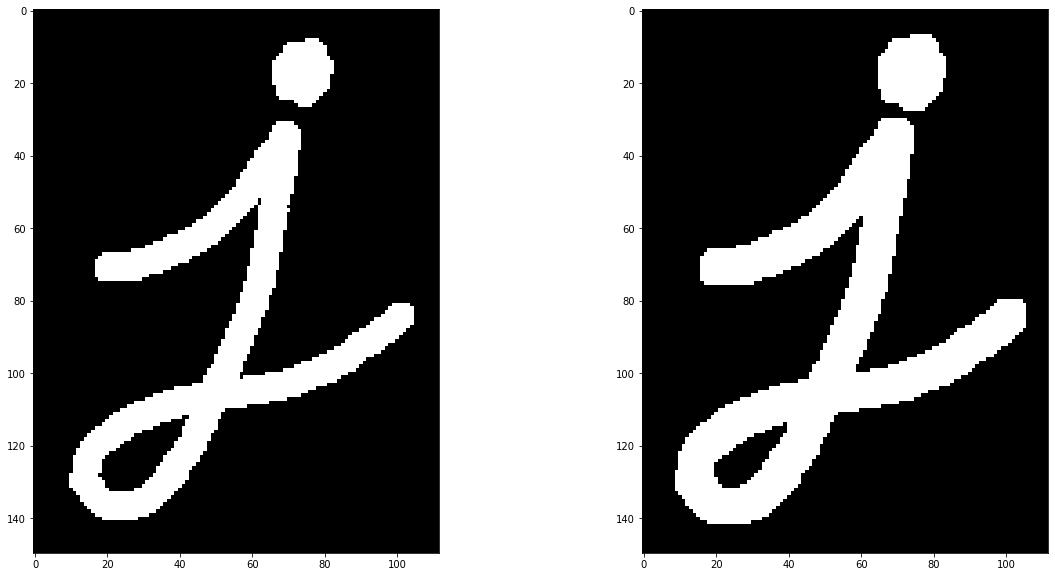

In [ ]:
# Dilation
img_dil = cv2.dilate(img, str_el)
imshow([img, img_dil])

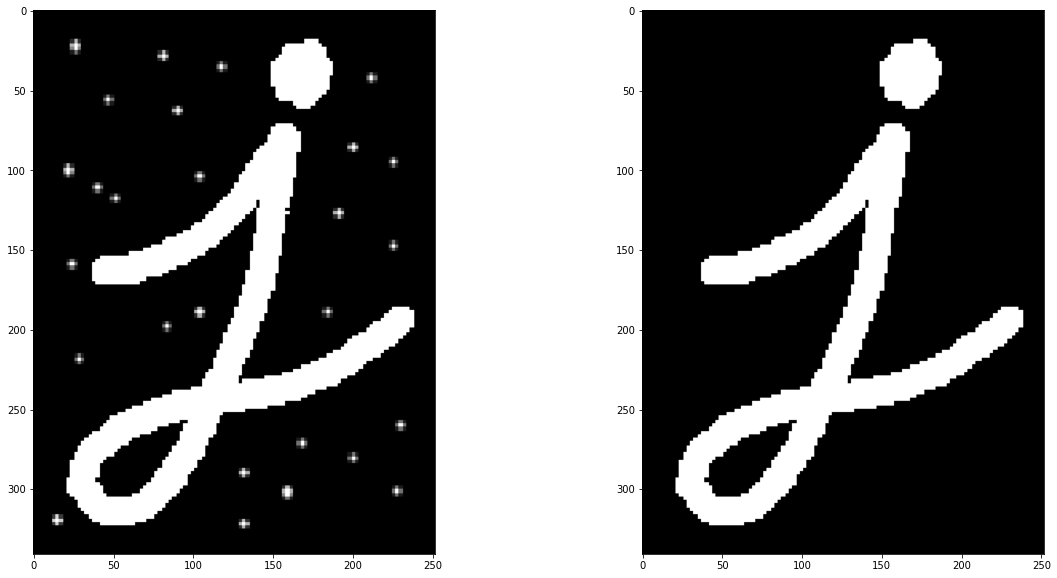

In [ ]:
# Opening
img = cv2.imread('./opening.png')
str_el = np.ones((9, 9)) # Change it.
img_opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, str_el)
imshow([img, img_opening])

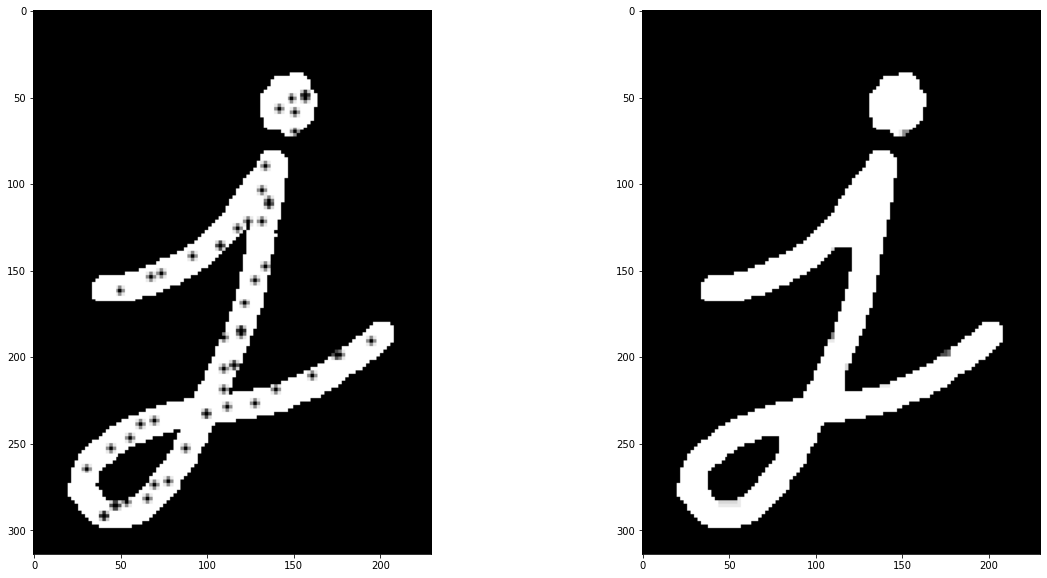

In [ ]:
# Closing
img = cv2.imread('./closing.png')
str_el = np.ones((9, 9)) # Change it.
img_closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, str_el)
imshow([img, img_closing])

### Find edges with morphology

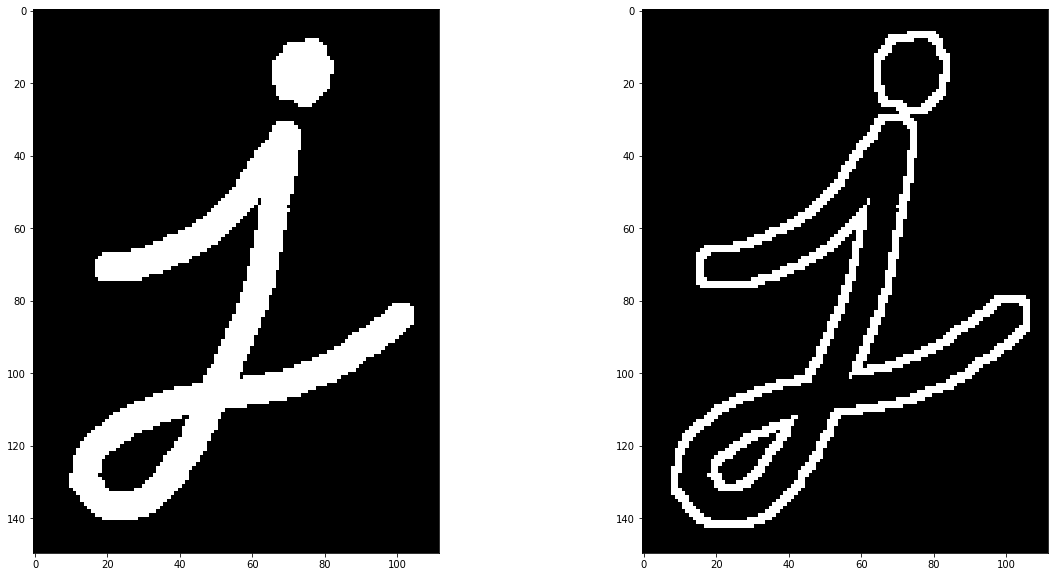

In [ ]:
img = cv2.imread('./morph.png', 0)

# Dilation
str_el = np.ones((5, 5))
dilated = cv2.dilate(img, str_el)

img_out = np.subtract(img, dilated)

imshow([img, img_out])

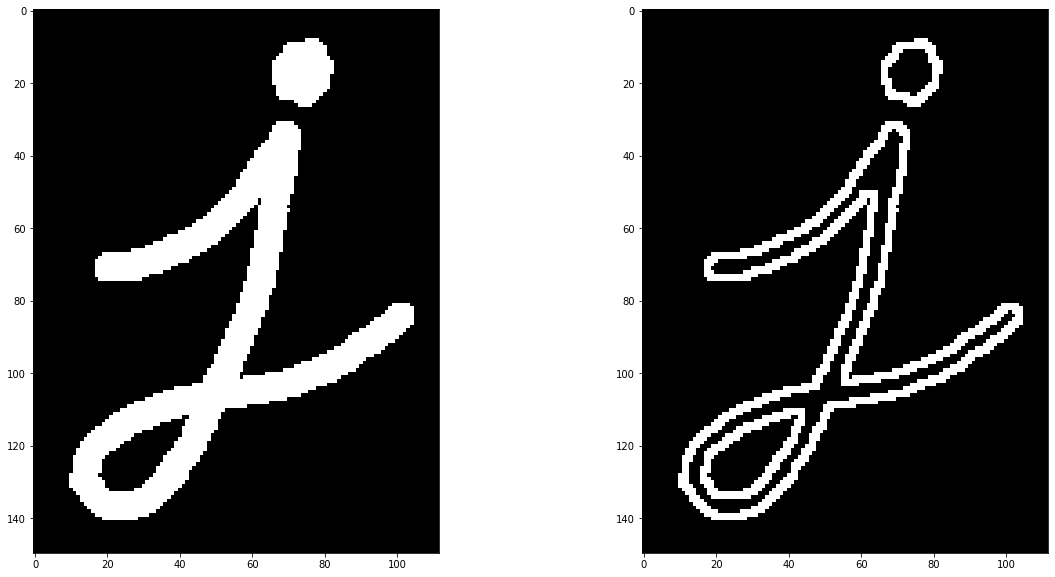

In [ ]:
# Erosion
str_el = np.ones((5, 5))
eroded = cv2.erode(img, str_el)

img_out = np.subtract(img, eroded)

imshow([img, img_out])

# Connected component

Find different components in the below image...

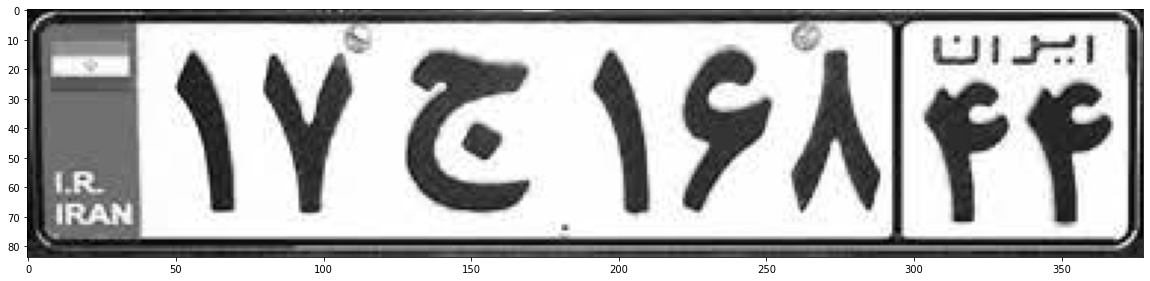

In [ ]:
img = cv2.imread('./plak_2.jpeg', 0)
imshow([img])

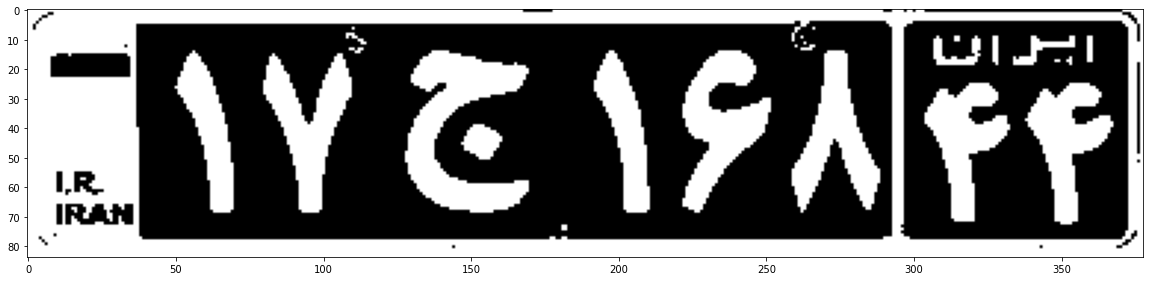

In [ ]:
thre, img_bin = cv2.threshold(img, -1, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
imshow([img_bin])

In [ ]:
# Create a connected component version of our binary image
output = cv2.connectedComponentsWithStats(img_bin, 8)

In [ ]:
(num_label, label, state, center) = output

In [ ]:
num_label

29

In [ ]:
label

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [ ]:
label.shape, img_bin.shape

((84, 378), (84, 378))

In [ ]:
state

array([[    2,     0,   375,    81, 18856],
       [    0,     0,   378,    84,  6915],
       [  110,     6,     1,     1,     1],
       [  266,     6,     1,     1,     1],
       [  108,     8,     7,     4,    10],
       [  262,     9,     1,     1,     1],
       [  307,     9,    16,    10,    73],
       [  314,     9,     2,     2,     4],
       [  327,     9,     2,    10,    19],
       [  334,     9,    21,    10,    69],
       [  359,     9,     2,     9,    18],
       [  263,    11,     1,     1,     1],
       [  109,    13,     5,     2,     6],
       [  260,    12,     1,     1,     1],
       [  262,    12,     5,     2,     6],
       [   50,    14,    20,    55,   509],
       [   80,    15,    30,    54,   727],
       [  128,    14,    42,    55,  1078],
       [  192,    14,    19,    55,   512],
       [  222,    14,    30,    55,   802],
       [  259,    14,    30,    55,   711],
       [  348,    17,     2,     1,     2],
       [  352,    16,     2,    

In [ ]:
state.shape

(29, 5)

In [ ]:
center

array([[198.61057488,  40.86126432],
       [141.05061461,  44.46999277],
       [110.        ,   6.        ],
       [266.        ,   6.        ],
       [110.8       ,   9.3       ],
       [262.        ,   9.        ],
       [314.15068493,  14.67123288],
       [314.5       ,   9.5       ],
       [327.52631579,  13.26315789],
       [343.1884058 ,  13.26086957],
       [359.5       ,  13.        ],
       [263.        ,  11.        ],
       [111.16666667,  13.33333333],
       [260.        ,  12.        ],
       [264.16666667,  12.66666667],
       [ 61.29666012,  40.55009823],
       [ 94.97111417,  38.5914718 ],
       [145.58719852,  40.09183673],
       [202.26367188,  40.7890625 ],
       [234.40773067,  37.76558603],
       [273.47819972,  43.42616034],
       [348.5       ,  17.        ],
       [352.75      ,  17.        ],
       [316.92569659,  43.80340557],
       [351.68892261,  43.96358118],
       [153.58035714,  44.38392857],
       [ 18.5       ,  57.        ],
 

In [ ]:
mask = np.zeros_like(img)
for i in range(num_label):
  h = state[i, 2]
  w = state[i, 3]
  if h > w:
    com_mask = (label==i).astype(np.uint8)
    mask = cv2.bitwise_or(mask, com_mask)

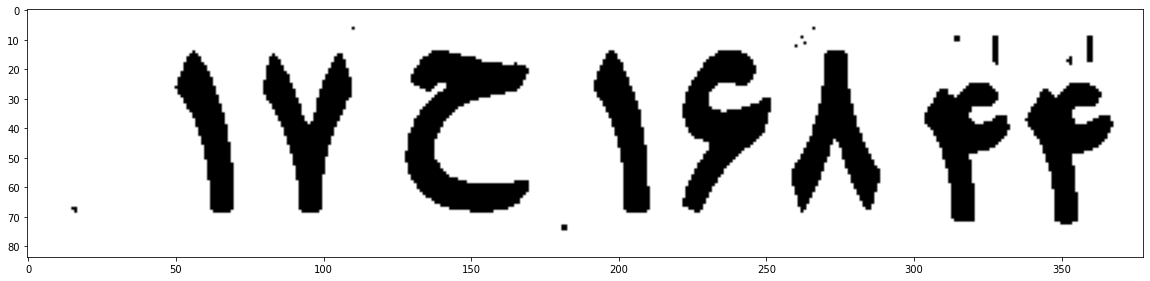

In [ ]:
imshow([mask])

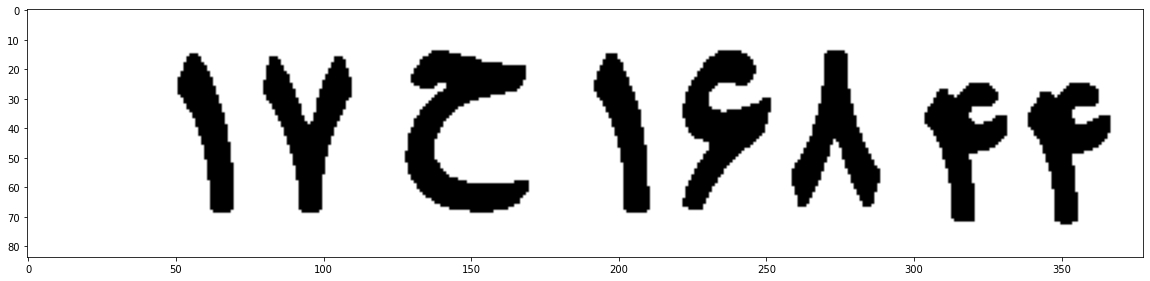

In [ ]:
# Apply an opening to clear black noises
struct_el = np.ones((3, 3))
output = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, struct_el)
imshow([output])

# Gamma equlizer

In [ ]:
def gamma_correction(image, gamma):
  map_gray = np.array([((i / 255) **gamma) *255 for i in range(256)]).astype(np.uint8)
  output = cv2.LUT(image, map_gray)
  return output

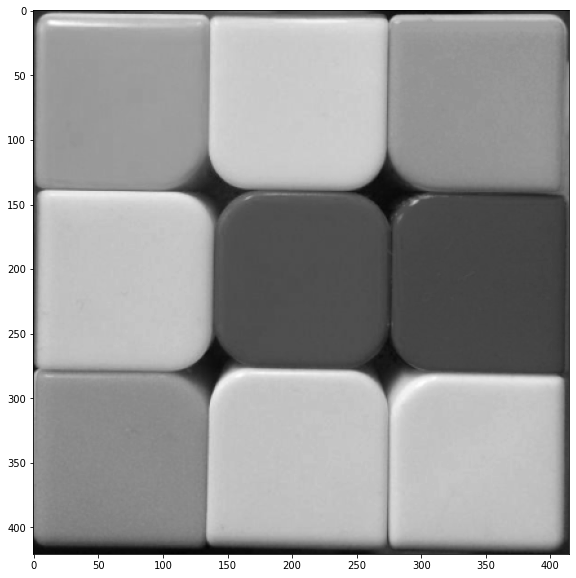

In [ ]:
img = cv2.imread('./rubik_high_lum_1.png', 0)
imshow([img])

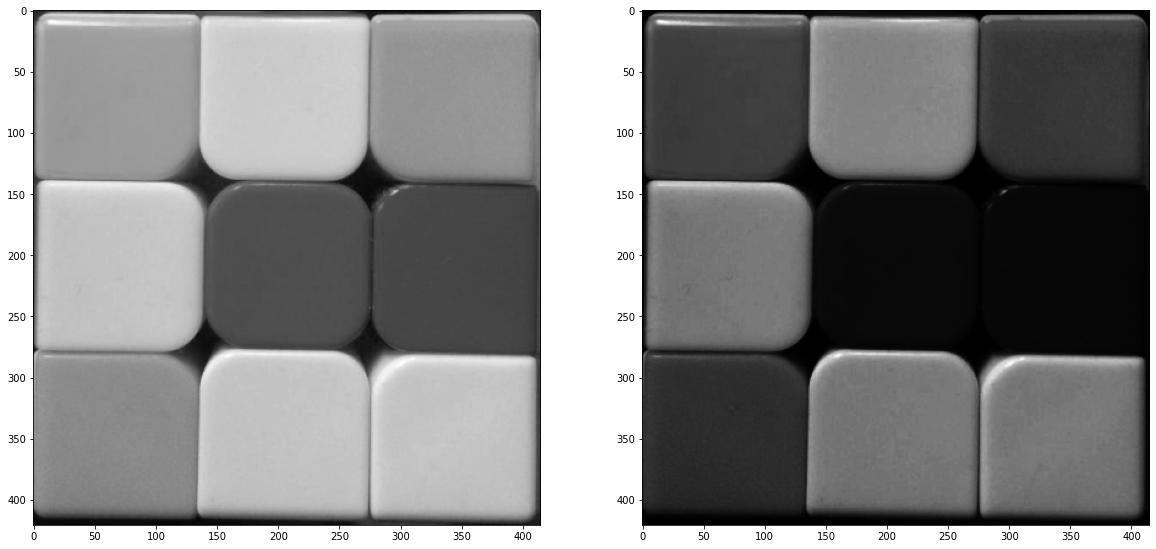

In [ ]:
low_bright = gamma_correction(img, 3)
imshow([img, low_bright])

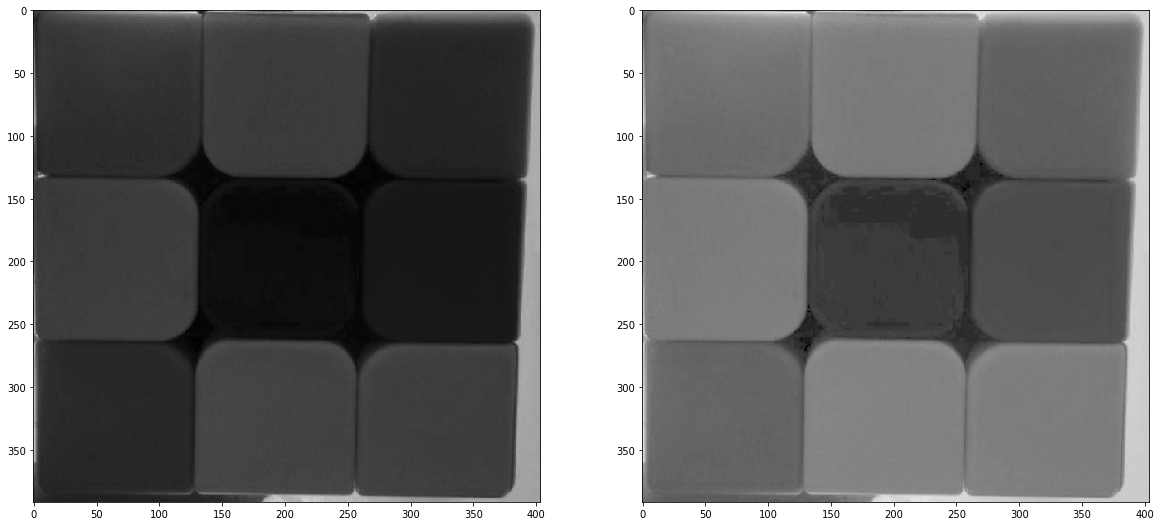

In [ ]:
img = cv2.imread('./rubik_low_lum_1.png', 0)
bright = gamma_correction(img, 0.5)
imshow([img, bright])

# Histogram

Histogram using OpenCv

```python
cv2.calcHist()
```

In [ ]:
def cal_hist(image, imshow=True):
  histogram = np.zeros(256)
  row, col = image.shape
  for r in range(row):
    for c in range(col):
      histogram[image[r, c]] += 1
  if imshow:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.bar(range(256), histogram)
  return histogram

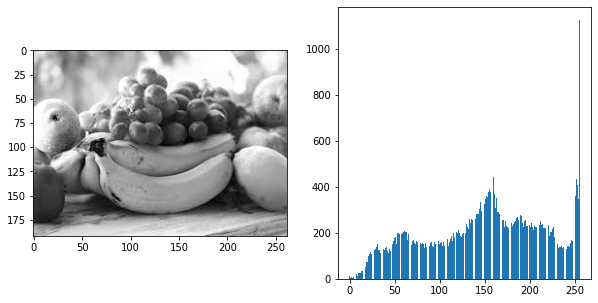

In [ ]:
image = cv2.imread('./fruits.jpeg', 0)
hist = cal_hist(image)

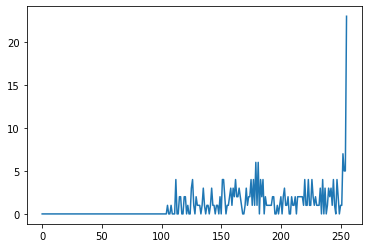

In [ ]:
# using opencv histogram function
hist = cv2.calcHist(image, [0], None, [256], [0, 256])
plt.plot(hist)

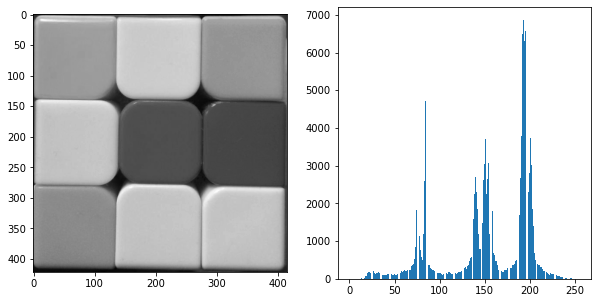

In [ ]:
img = cv2.imread('./rubik_high_lum_1.png', 0)
hist = cal_hist(img)

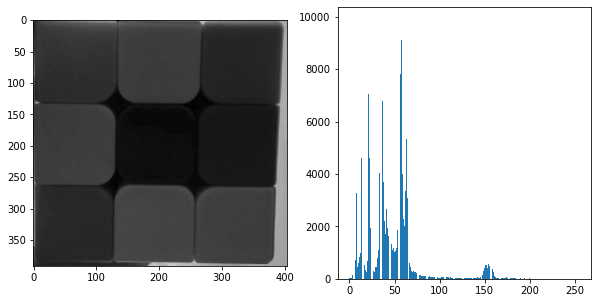

In [ ]:
img = cv2.imread('./rubik_low_lum_1.png', 0)
hist = cal_hist(img)

# CDF

In [ ]:
def cal_cdf(hist, imshow=True):
  cdf = np.cumsum(hist)
  cdf /= np.max(cdf)
  if imshow:
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(cdf)
  return cdf

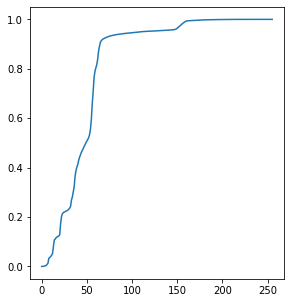

In [ ]:
cdf = cal_cdf(hist)

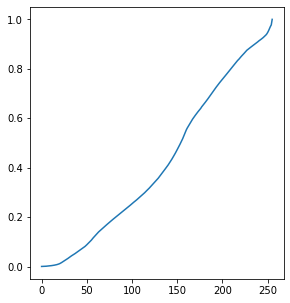

In [ ]:
image = cv2.imread('./fruits.jpeg', 0)
hist = cal_hist(image, False)
cdf = cal_cdf(hist)

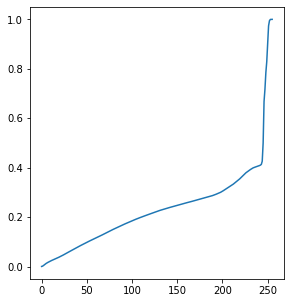

In [ ]:
img = cv2.imread('./evan.jpg', 0)
hist = cal_hist(img, False)
cdf = cal_cdf(hist)

# Histogram equilizer

In [ ]:
def hist_equ(image):
  hist = cal_hist(image, False)
  cdf = cal_cdf(hist, False)
  gray_map = np.array([round(cdf[i]*255) for i in range(256)]).astype(np.uint8)
  output = cv2.LUT(image, gray_map)

  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(image, cmap='gray')
  plt.subplot(1, 2, 2)
  plt.imshow(output, cmap='gray')

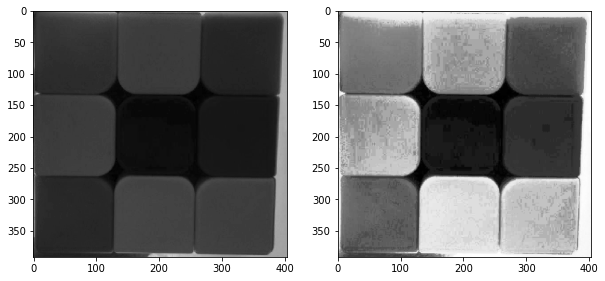

In [ ]:
hist_equ(img)

# Histogram equlizer using OpenCV

```python
cv2.equalizerHist(image)
```

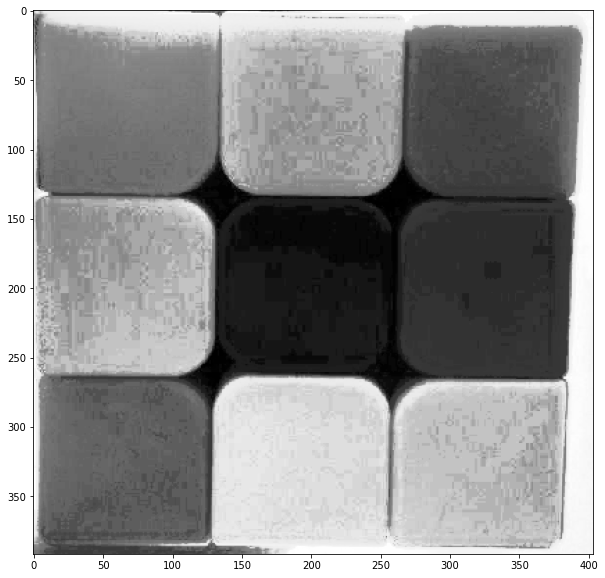

In [ ]:
output = cv2.equalizeHist(img)
imshow([output])

# Adaptive Histogram Equalization (Contrast Adaptive Localized Histogram Equalization - CLAHE)

Apply histogram equalization locally.

```python
cv2.createCLAHE(cliplimit, tileGridSize)
```

In [ ]:
clahe = cv2.createCLAHE(clipLimit=0.2, tileGridSize=(15, 15))

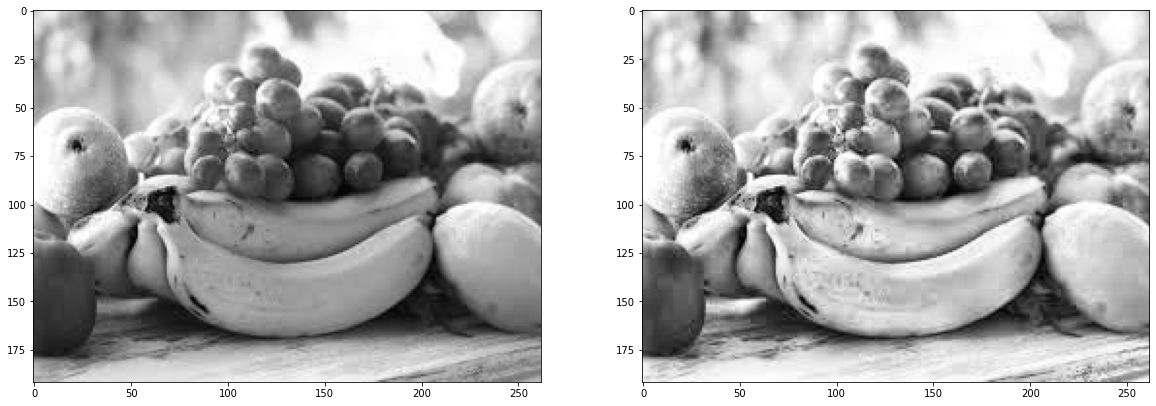

In [ ]:
image = cv2.imread('./fruits.jpeg', 0)
output = clahe.apply(image)
imshow([image, output])

## In RGB mode

In [ ]:
image = cv2.imread('./fruits.jpeg')
h, s, v = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))

In [ ]:
v_equ = cv2.equalizeHist(v)

In [ ]:
output = cv2.cvtColor(cv2.merge([h, s, v_equ]), cv2.COLOR_HSV2RGB)

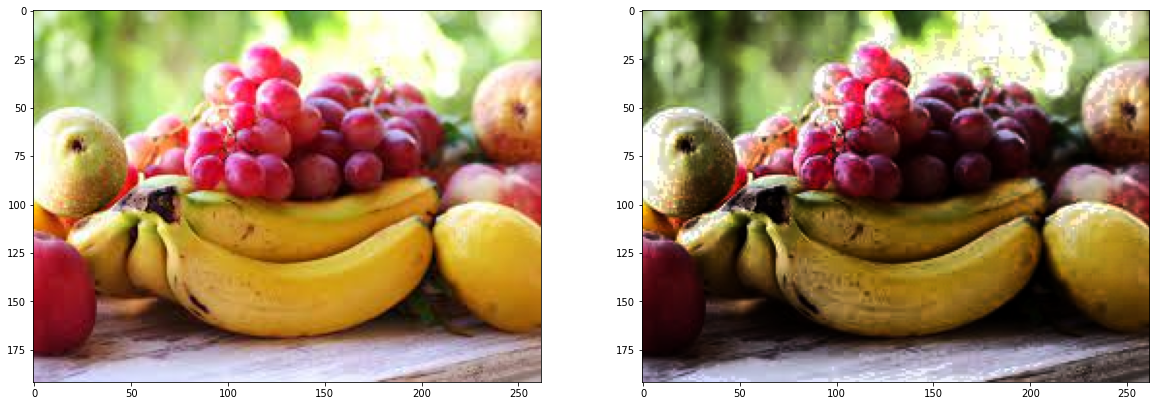

In [ ]:
imshow([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), output])

# Image Denoising

In [ ]:
def image_filtering(image, filter):
  filter_size = filter.shape[0]
  pad_size = filter_size // 2
  image_pad = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_CONSTANT)
  row, col = image.shape
  output = np.zeros_like(image)
  for r in range(pad_size, row - pad_size):
    for c in range(pad_size, col - pad_size):
      slice = image_pad[r - pad_size: r + pad_size + 1, c - pad_size: c + pad_size + 1]
      output[r - pad_size, c - pad_size] = np.sum(slice * filter)
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(image, cmap='gray')
  plt.subplot(1, 2, 2)
  plt.imshow(output, cmap='gray')

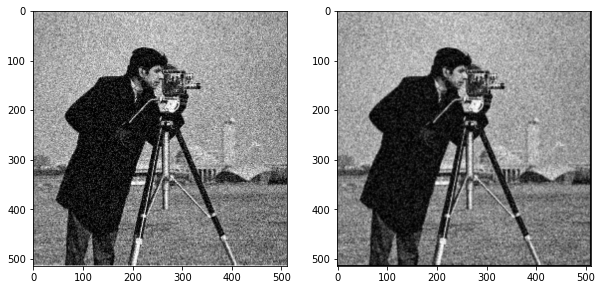

In [ ]:
image = cv2.imread('./noise_5.png', 0)
filter = np.ones((3, 3)) / 9
filtered_img = image_filtering(image, filter)

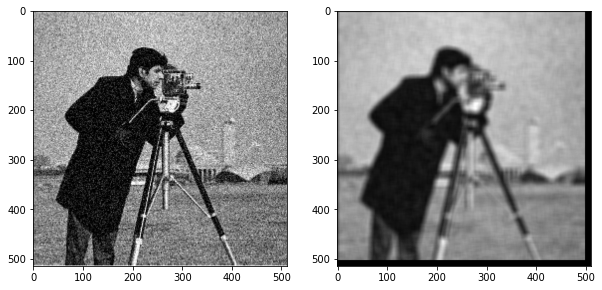

In [ ]:
filter = np.ones((13, 13)) / (13 * 13)
filtered_img = image_filtering(image, filter)

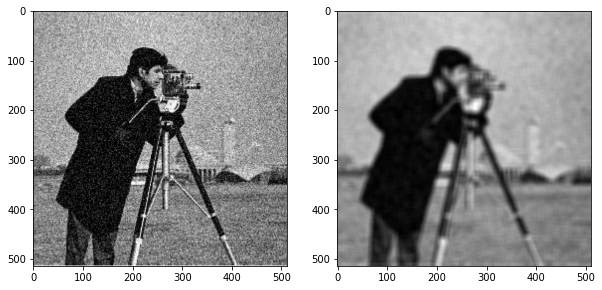

In [ ]:
# With OpenCV
output = cv2.blur(image, (13, 13))
imshow([image, output], (10, 5))

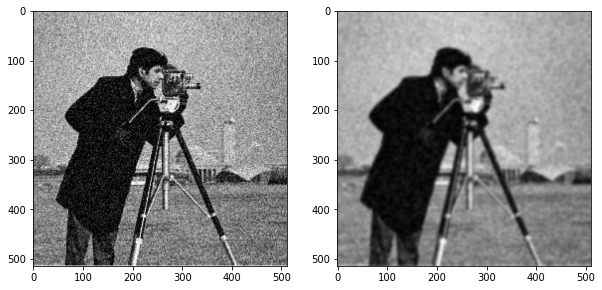

In [ ]:
# Gussian blur
output = cv2.GaussianBlur(image,(15, 15), 0) # Using 0 tells the function to compute sigma by itself.
imshow([image, output], (10, 5))

## Practice on noisy images

### Gaussian Blur

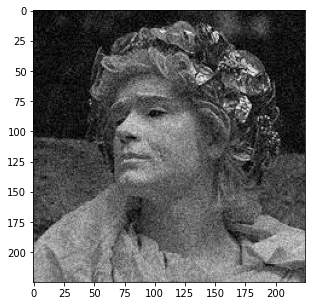

In [ ]:
image = cv2.imread('./noise_1.jpeg', 0)
imshow([image], (10, 5))

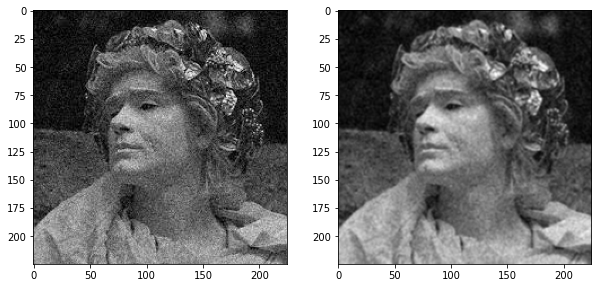

In [ ]:
output = cv2.GaussianBlur(image, (3, 3), 0)
imshow([image, output], (10, 5))

### Salt and Pepper noise

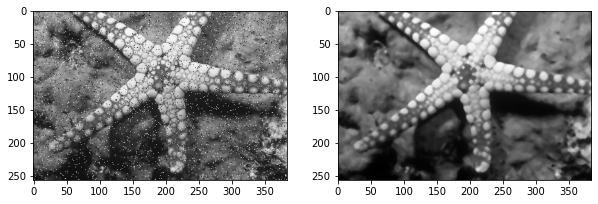

In [ ]:
# Salt and Pepper noise
image = cv2.imread('./sp_noise_1.png', 0)
output = cv2.medianBlur(image, 5)
imshow([image, output], (10, 5))

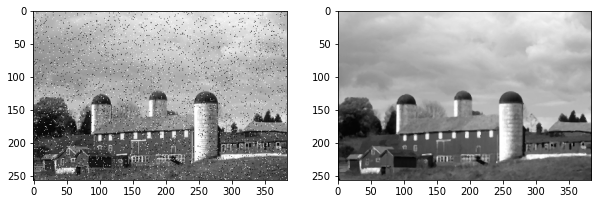

In [ ]:
image = cv2.imread('./sp_noise_2.png', 0)
output = cv2.medianBlur(image, 3)
imshow([image, output], (10, 5))

### Bilateral filter

```python
cv2.bilateralFilter(src, ksize, r_simga, s_simga)
```

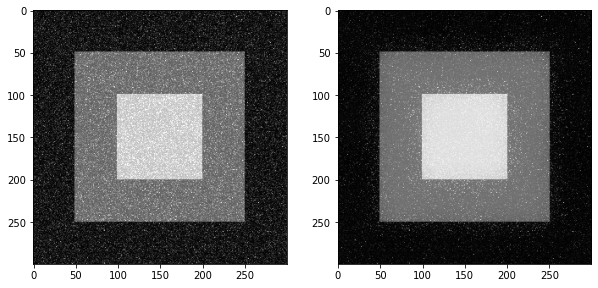

In [ ]:
image = cv2.imread('./noise_4.png', 0)
output = cv2.bilateralFilter(image, 50, 30, 50)
imshow([image, output], (10, 5))

## Create a gaussian kernel

In [ ]:
gau = cv2.getGaussianKernel(7, -1) # -1 compute STD by itself.
gau

array([[0.03125 ],
       [0.109375],
       [0.21875 ],
       [0.28125 ],
       [0.21875 ],
       [0.109375],
       [0.03125 ]])

In [ ]:
np.sum(gau)

1.0

In [ ]:
gau2d = gau @ gau.T
gau2d

array([[0.00097656, 0.00341797, 0.00683594, 0.00878906, 0.00683594,
        0.00341797, 0.00097656],
       [0.00341797, 0.01196289, 0.02392578, 0.03076172, 0.02392578,
        0.01196289, 0.00341797],
       [0.00683594, 0.02392578, 0.04785156, 0.06152344, 0.04785156,
        0.02392578, 0.00683594],
       [0.00878906, 0.03076172, 0.06152344, 0.07910156, 0.06152344,
        0.03076172, 0.00878906],
       [0.00683594, 0.02392578, 0.04785156, 0.06152344, 0.04785156,
        0.02392578, 0.00683594],
       [0.00341797, 0.01196289, 0.02392578, 0.03076172, 0.02392578,
        0.01196289, 0.00341797],
       [0.00097656, 0.00341797, 0.00683594, 0.00878906, 0.00683594,
        0.00341797, 0.00097656]])

In [ ]:
np.sum(gau2d)

1.0

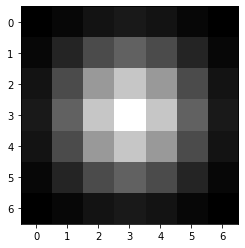

In [ ]:
plt.imshow(gau2d, cmap='gray')